In [78]:
#Importing the ncessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats import   ttest_1samp
from statsmodels.stats.anova import _get_covariance, anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from scipy.stats import norm
from sklearn.impute import SimpleImputer

## **Note: Problem 1, 2 & 4th are solved in Business Report hence not part of the python notebook**




### Problem 3: per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg

In [ ]:
Mean=5
Std=1.5

**3.1** What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [ ]:
#X = 3.17 ,  μ = 5,  σ = 1.5
#Z score =	x - μ/ σ

z=(3.17 - 5)/ 1.5
z

-1.22

In [ ]:
stats.norm.cdf(-1.22)


0.11123243744783456

Hence as per the p value, 11.12 % of the gunny bags have a breaking strength less than 3.17 kg per sq cm

 3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [ ]:
#X = 3.6 ,  μ = 5,  σ = 1.5
#Z score =	x - μ/ σ

z=(3.6 - 5)/ 1.5
z

-0.9333333333333332

In [ ]:
1-stats.norm.cdf(-0.9333333333333332)


0.8246760551477705

Hence as per the p value, 82.47% of the gunny bags have a breaking strength at least 3.6 kg per sq cm

3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [ ]:
#X = 5.5 ,  μ = 5,  σ = 1.5
#Z score =	x - μ/ σ

z=(5.5 - 5)/ 1.5
z

0.3333333333333333

In [ ]:
stats.norm.cdf(0.3333333333333333)-0.5

0.13055865981823633

Hence as per the p value, 13.06% of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm


3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?


In [ ]:
Prob = stats.norm.cdf(3,loc=mu,scale=sigma) + 1- stats.norm.cdf(7.5,loc=mu,scale=sigma)
Prob

0.13900157199868257

Hence as per the p value, 13.90% of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm


##Problem 5:

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);



In [ ]:
#importing the dataset
Zingaro=pd.read_csv('Zingaro_Company.csv')

In [ ]:
Zingaro.head() #Finding the headers of the dataset

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
Zingaro.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
Zingaro.shape #shape of the dataset

(75, 2)

In [ ]:
Zingaro.isnull().sum() #checking null values

Unpolished              0
Treated and Polished    0
dtype: int64

In [ ]:
Zingaro.describe(include='all').T #Five Points summary

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


In [ ]:
#making a variable for Mean & Std deviation of each type of stone
sigma_unpolished=Zingaro['Unpolished '].std()
Mu_unpolished=Zingaro['Unpolished '].mean()
Mu_unpolished, sigma_unpolished

(134.11052653373332, 33.0418044136061)

In [ ]:
sigma_polished=Zingaro['Treated and Polished'].std()
Mu_polished=Zingaro['Treated and Polished'].mean()
Mu_polished , sigma_polished

(147.78811718133335, 15.587355273119853)

5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

H0 = The unpolished stones may be suitable for printing

H1 = The unpolished stones may Not be suitable for printing

* H0(unpolised) >= 150 

* HA(unpolised) < 150 

In [ ]:
# We will perform one sample t-test 
# Hypothesised Mean = 150
t_statistic, p_value = ttest_1samp(Zingaro['Unpolished '], 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -4.164629601426758 p value: 8.342573994839285e-05 


In [ ]:
print ("one sample t-test p-value=", p_value/2)
alpha_level = 0.05
if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

one sample t-test p-value= 4.1712869974196425e-05
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


5.2 Is the mean hardness of the polished and unpolished stones the same?

* H0: Mu{unpolised0 = Mu(Polisedand Treated) 

* Ha: Mu{unpolised0 != Mu(Polisedand Treated) 

In [ ]:
t_statistic, p_value  = ttest_ind(data1['Unpolished '],data1['Treated and Polished'])
print('tstat',t_statistic)    
print('P Value',p_value)

tstat -3.242232050141406
P Value 0.001465515019462831


In [ ]:
print ("Paired two-sample t-test p-value=", p_value)

alpha_level = 0.05

if (p_value) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

Paired two-sample t-test p-value= 0.001465515019462831
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


**Problem 6:**

 

Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [136]:
ahc=pd.read_csv("Aquarius_gym.csv")

In [137]:
ahc #Head & tail of dataset

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44
...,...,...,...
95,96,16,18
96,97,19,28
97,98,24,28
98,99,14,24


In [138]:
ahc.describe().T #five point summary

,count,mean,std,min,25%,50%,75%,max
Sr no.,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Before,100.0,26.94,8.806357,3.0,21.75,28.0,32.25,47.0
After,100.0,32.49,8.779562,10.0,26.00,34.0,39.00,51.0


In [139]:
ahc.shape #Size of the dataset

(100, 3)

In order to find out whether the training will make a difference of more than 5, let us assume below hypothesis


Null hypothesis= The training will not  make a diffrence of more than 5 push-up

Alternative hypthesis =  The training will not make a diffrence of more than 5 push-ups,

H0: mu(after) - mu(before) = >=5 

Ha: mu(after) - mu(before) = <5 


Here we select  α  = 0.05 as given in the question.

Identify the test statistic
The Sample sizes for both samples are  same and We have two paired samples

* The sample is a large sample, n > 30. So we use the t distribution and the tSTAT test statistic for two sample paired test.

Let us find out the the p - value and test statistic

In [140]:
# paired t-test: when comparing the before and after changes
t_statistic, p_value  =  ttest_rel(ahc['Before'], ahc['After'] - 5)
print('tstat  %1.3f' % t_statistic)    
print("p-value for one-tail:", (1-p_value/2))

tstat  -1.915
p-value for one-tail: 0.9708011278589889


In [142]:
# p_value < 0.05 => alternative hypothesis:
# The results don't have the same mean at the 5% significance level
print ("Paired two-sample t-test p-value=", 1-p_value/2)
alpha_level = 0.05
if (1-p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

Paired two-sample t-test p-value= 0.9708011278589889
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis


##Problem 7:

Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the Temp at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [79]:
dental=pd.read_excel('Dental Hardness data.xlsx',sheet_name='Data') #Importing the dataset

In [84]:
dental #Checking the head & tail of data

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
...,...,...,...,...,...
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405


In [85]:
dental.shape #Checking size of dataset

(90, 5)

In [86]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [88]:
dental.isnull().sum() #Checking Null values

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [90]:
dental.describe().T #Five Point Summary

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


##Test for Normality - Shapiro - Wilk

Ho: Population from which sample is drawn is normally distributed

Ha : Population from which sample is drawn is not normally distributed

In [91]:
dental['Dentist'] = pd.Categorical(dental['Dentist'])
dental['Method'] = pd.Categorical(dental['Method'])
dental['Alloy'] = pd.Categorical(dental['Alloy'])

In [95]:
#Applying Shapiro test on Dentist 
Dentist1 = dental[dental['Dentist'] == 1]['Response']
Dentist2 = dental[dental['Dentist'] == 2]['Response']
Dentist3 = dental[dental['Dentist'] == 3]['Response']
Dentist4 = dental[dental['Dentist'] == 4]['Response']
Dentist5 = dental[dental['Dentist'] == 5]['Response']
print(stats.shapiro(Dentist1))
print(stats.shapiro(Dentist2))
print(stats.shapiro(Dentist3))
print(stats.shapiro(Dentist4))
print(stats.shapiro(Dentist5))


ShapiroResult(statistic=0.9288938045501709, pvalue=0.18567582964897156)
ShapiroResult(statistic=0.9665580987930298, pvalue=0.731051504611969)
ShapiroResult(statistic=0.9573881030082703, pvalue=0.5520960092544556)
ShapiroResult(statistic=0.8089416027069092, pvalue=0.0020372250583022833)
ShapiroResult(statistic=0.9546376466751099, pvalue=0.5022979378700256)


Sample for Dentist = 4 seems to be drawn from a population which is not normally distributed - p - value < 0.05

We go for Anderson Darling Test only after shapiro - wilk test fails

In [113]:
#Applying anderson test on Dentist 
print(stats.anderson(Dentist1, dist = 'norm'))
print(stats.anderson(Dentist2, dist = 'norm'))
print(stats.anderson(Dentist3, dist = 'norm'))
print(stats.anderson(Dentist4, dist = 'norm'))
print(stats.anderson(Dentist5, dist = 'norm'))

AndersonResult(statistic=0.5572318170702566, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.18489207423293763, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.31139490001785575, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.2944798644002624, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.3980880088398422, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


alpha = 0.05, critical value = 0.687, test statistic for Dentist 4  > CV of alpha

Sample for Dentist 4 seems to be drawn from a population which is not normally distributed

In [114]:
#Applying Shapiro test on  Method
Method1 = dental[dental['Method'] == 1]['Response']
Method2 = dental[dental['Method'] == 2]['Response']
Method3 = dental[dental['Method'] == 3]['Response']
print(stats.shapiro(Method1))
print(stats.shapiro(Method2))
print(stats.shapiro(Method3))

ShapiroResult(statistic=0.9652425050735474, pvalue=0.4183921217918396)
ShapiroResult(statistic=0.9371029138565063, pvalue=0.07601772248744965)
ShapiroResult(statistic=0.9091950058937073, pvalue=0.014201578684151173)


Shapiro's Test Fails for Method 3  Sample - p - value < 0.05

In [115]:
#Applying anderson test on Method 
print(stats.anderson(Method1, dist = 'norm'))
print(stats.anderson(Method2, dist = 'norm'))
print(stats.anderson(Method3, dist = 'norm'))

AndersonResult(statistic=0.31355911678428683, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.5334878167302541, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.9931748727975211, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


alpha = 0.05, critical value = 0.712, test statistic for Method 3 > CV of alpha

Sample for Method 3 seems to be drawn from a population which is not normally distributed

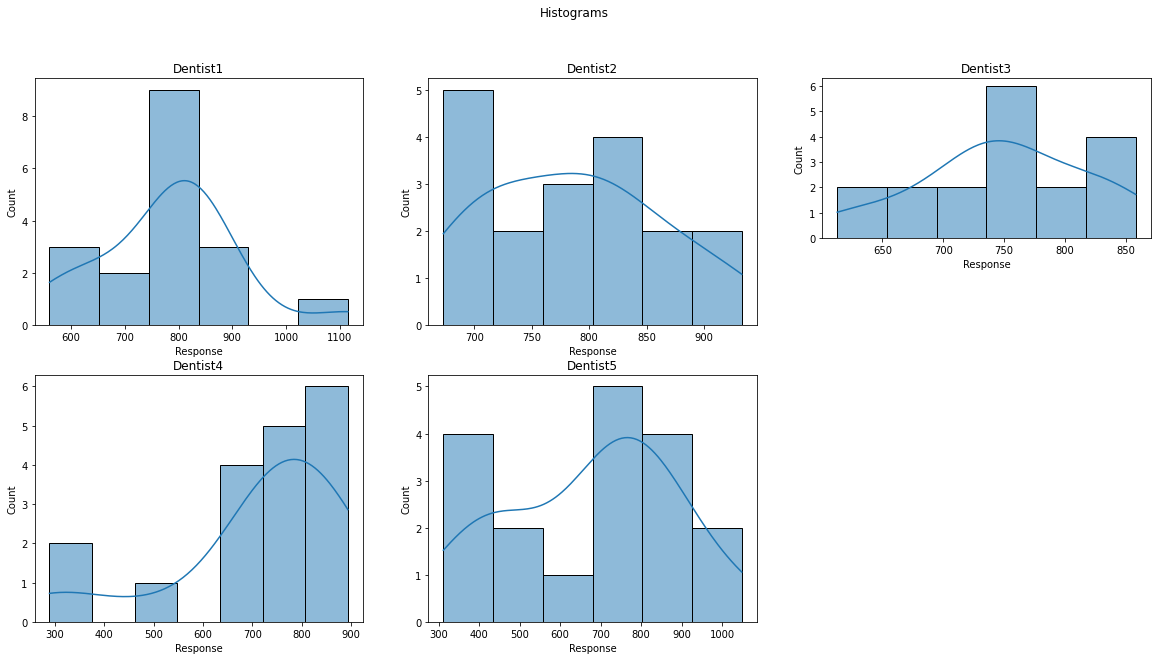

In [112]:
#Distribution Plot of Dentist
plt.figure(figsize =[20,10])
plt.suptitle('Histograms')
plt.subplot(2,3,1)
plt.title('Dentist1')
sns.histplot(Dentist1, kde = 'True');
plt.subplot(2,3,2)
plt.title('Dentist2')
sns.histplot(Dentist2, kde = 'True');
plt.subplot(3,3,3)
plt.title('Dentist3')
sns.histplot(Dentist3, kde = 'True');
plt.subplot(2,3,4)
plt.title('Dentist4')
sns.histplot(Dentist4, kde = 'True');
plt.subplot(2,3,5)
plt.title('Dentist5')
sns.histplot(Dentist5, kde = 'True');


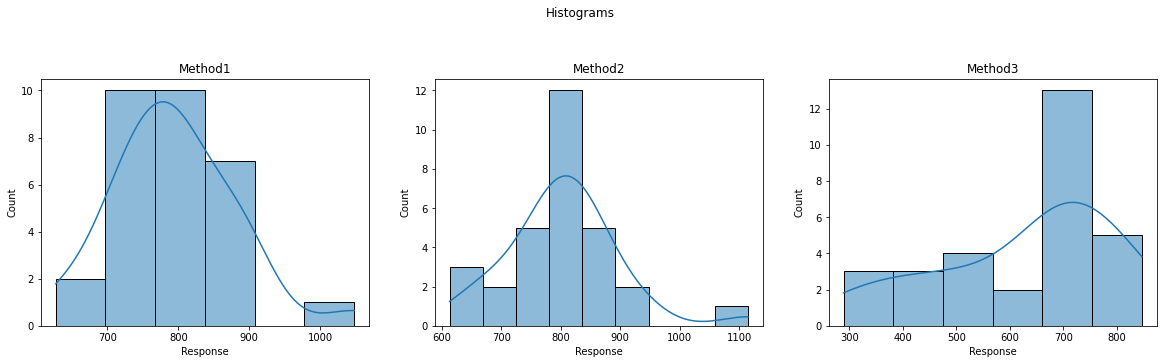

In [108]:
#Distribution plot of Method
plt.figure(figsize =[20,10])
plt.suptitle('Histograms')
plt.subplot(2,3,1)
plt.title('Method1')
sns.histplot(Method1, kde = 'True');
plt.subplot(2,3,2)
plt.title('Method2')
sns.histplot(Method2, kde = 'True');
plt.subplot(2,3,3)
plt.title('Method3')
sns.histplot(Method3, kde = 'True');

Performing one way ANOVA with 'Method' with respect to 'responses'.

## 7.1. Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?

In [118]:
#Creating two seperate sets for each Alloy
dental1 = dental[dental['Alloy'] == 1]
dental2 = dental[dental['Alloy'] == 2]

## The Hypothesis for the One Way ANOVA are:

H0: There is difference among Dentists on implant hardness

Ha: There is no difference among Dentists on implant hardness


In [119]:
#For Alloy 1
formula = 'Response ~ C(Dentist)'
model = ols(formula, dental1).fit()
anova_table = anova_lm(model)
print(anova_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


at p - value > 0.05 Fail to Reject H0

i.e At 95 % confidence we have statistical evidence to state that Dentists has no effect on implant hardness

In [120]:
#For Alloy 2
formula = 'Response ~ C(Dentist)' 
model = ols(formula, dental2).fit()
anova_table = anova_lm(model)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [ ]:
at p - value > 0.05 Fail to Reject H0

i.e At 95 % confidence we have statistical evidence to state that Dentists has no effect on implant hardness

2.Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.? 

3.Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?

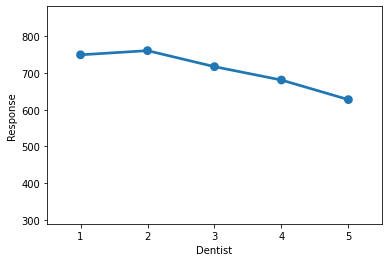

In [121]:
plt.ylim(dental1['Response'].min(), dental1['Response'].max())
sns.pointplot(y = 'Response', x = 'Dentist', data = dental1, ci = None);

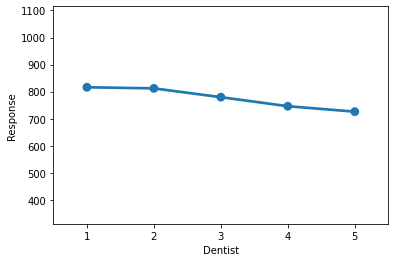

In [122]:
plt.ylim(dental2['Response'].min(), dental2['Response'].max())
sns.pointplot(y = 'Response', x = 'Dentist', data = dental2, ci = None);

4.Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?

Performing One Way ANOVA with the variable 'Method' with respect to 'Response'

The Hypothesis for the One Way ANOVA are:

H0: There is difference with Method on implant hardness

Ha: There is no difference with Method on implant hardness


In [123]:
formula = 'Response ~ C(Method)'
model = ols(formula, dental1).fit()
anova_table = anova_lm(model)
print(anova_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [124]:
formula = 'Response ~ C(Method)'
model = ols(formula, dental2).fit()
anova_table = anova_lm(model)
print(anova_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


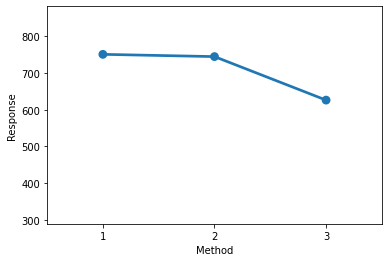

In [126]:
plt.ylim(dental1['Response'].min(), dental1['Response'].max())
sns.pointplot(y = 'Response', x = 'Method', data = dental1, ci = None);

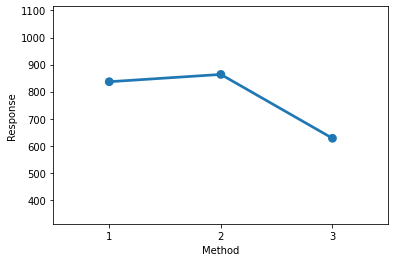

In [127]:
plt.ylim(dental2['Response'].min(), dental2['Response'].max())
sns.pointplot(y = 'Response', x = 'Method', data = dental2, ci = None);

Hence at p - value < 0.05, we accept H0, i.e At 95 % confidence we have statistical evidence to state that there is difference among the method used on implant hardness

Performing One Way ANOVA with the variable 'Temp' with respect to 'Response'.

5.Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

### The Hypothesis for the One Way ANOVA are:
H0: Temp has no impact on hardness

Ha: Temp has impact on hardness

In [ ]:
formula = 'Response ~ C(Temp)'
model = ols(formula, dfa1).fit()
anova_table = anova_lm(model)
print(anova_table)

            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


In [ ]:
formula = 'Response ~ C(Temp)'
model = ols(formula, dfa2).fit()
anova_table = anova_lm(model)
print(anova_table)

            df        sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN


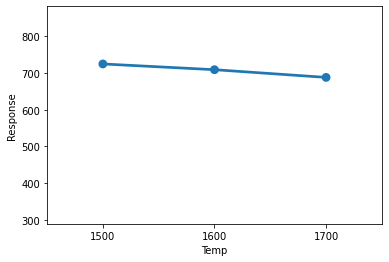

In [128]:
plt.ylim(dental1['Response'].min(), dental1['Response'].max())
sns.pointplot(y = 'Response', x = 'Temp', data = dental1, ci = None);

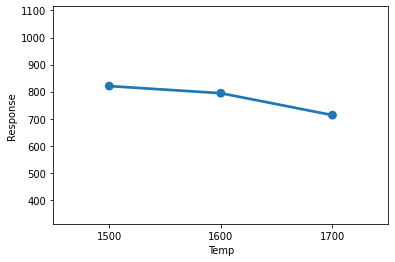

In [129]:
plt.ylim(dental2['Response'].min(), dental2['Response'].max())
sns.pointplot(y = 'Response', x = 'Temp', data = dental2, ci = None);

6. Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?

**Let us check whether there is any interaction effect between the method.**


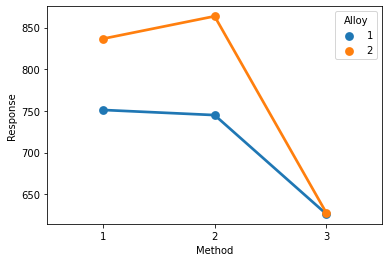

In [130]:
sns.pointplot(x='Method', y='Response', data=dental, hue='Alloy',ci=None);

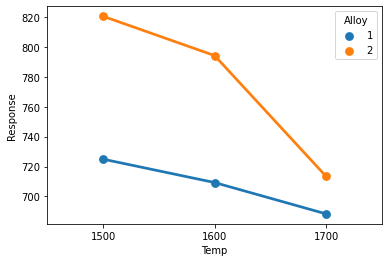

In [131]:
sns.pointplot(x='Temp', y='Response', data=dental, hue='Alloy',ci=None);

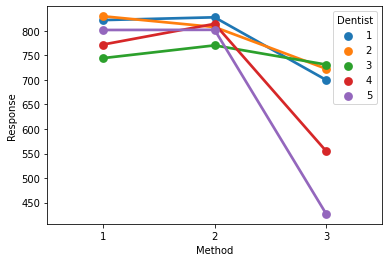

In [132]:
sns.pointplot(x='Method', y='Response', data=dental, hue='Dentist',ci=None);

7.Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?

In [133]:
formula = 'Response ~ C(Method) + C(Dentist) + C(Method):C(Dentist)'
model = ols(formula, dental).fit()
anova_table = anova_lm(model)
print(anova_table)

                        df         sum_sq        mean_sq          F  \
C(Method)              2.0  593427.488889  296713.744444  26.702047   
C(Dentist)             4.0  157794.555556   39448.638889   3.550086   
C(Method):C(Dentist)   8.0  306471.844444   38308.980556   3.447526   
Residual              75.0  833401.666667   11112.022222        NaN   

                            PR(>F)  
C(Method)             1.750208e-09  
C(Dentist)            1.045384e-02  
C(Method):C(Dentist)  1.969515e-03  
Residual                       NaN  


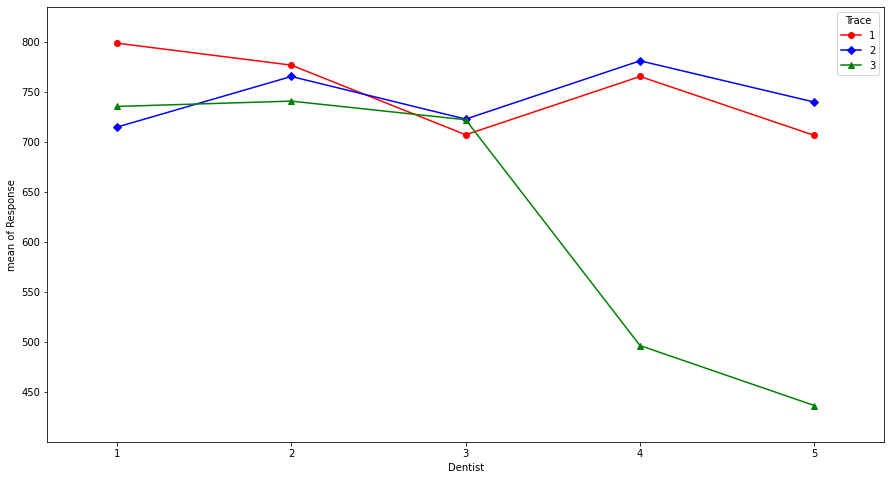

In [134]:
fig, ax = plt.subplots(figsize = [15,8])
fig = interaction_plot(np.array(dental1['Dentist']), np.array(dental1['Method']), np.array(dental1['Response']), markers = ['o', 'D', '^'], 
                       colors = ['red', 'blue', 'green'], ax = ax, xlabel = 'Dentist', ylabel = 'Response', ms = 6);

All methods have interaction among them.

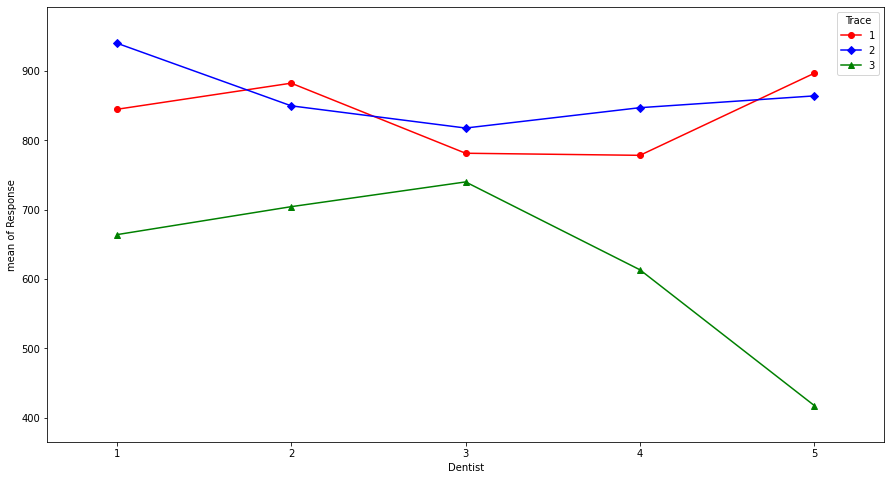

In [ ]:
fig, ax = plt.subplots(figsize = [15,8])
fig = interaction_plot(np.array(dental2['Dentist']), np.array(dental2['Method']), np.array(dental2['Response']), markers = ['o', 'D', '^'], 
                       colors = ['red', 'blue', 'green'], ax = ax, xlabel = 'Dentist', ylabel = 'Response', ms = 6);

Method 1 & Method 2 has interaction among them. While Method 3 has no interactions with others.
